In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook


![one of the saddles](Selection_006.png)

actually this looks like a non-strict saddle since f'' is 0 at the saddle

### Run methods

<IPython.core.display.Javascript object>


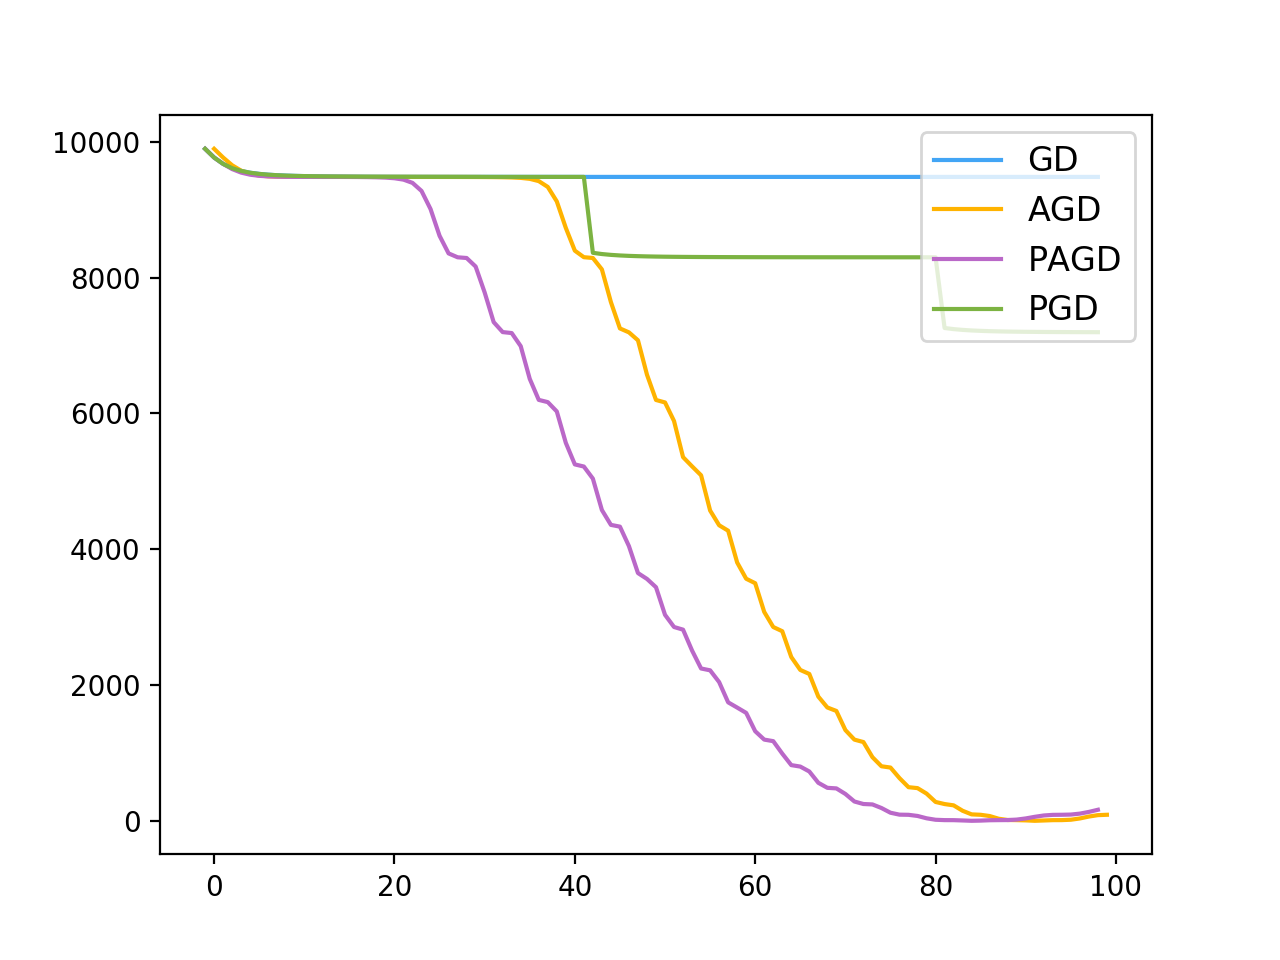

<IPython.core.display.Javascript object>


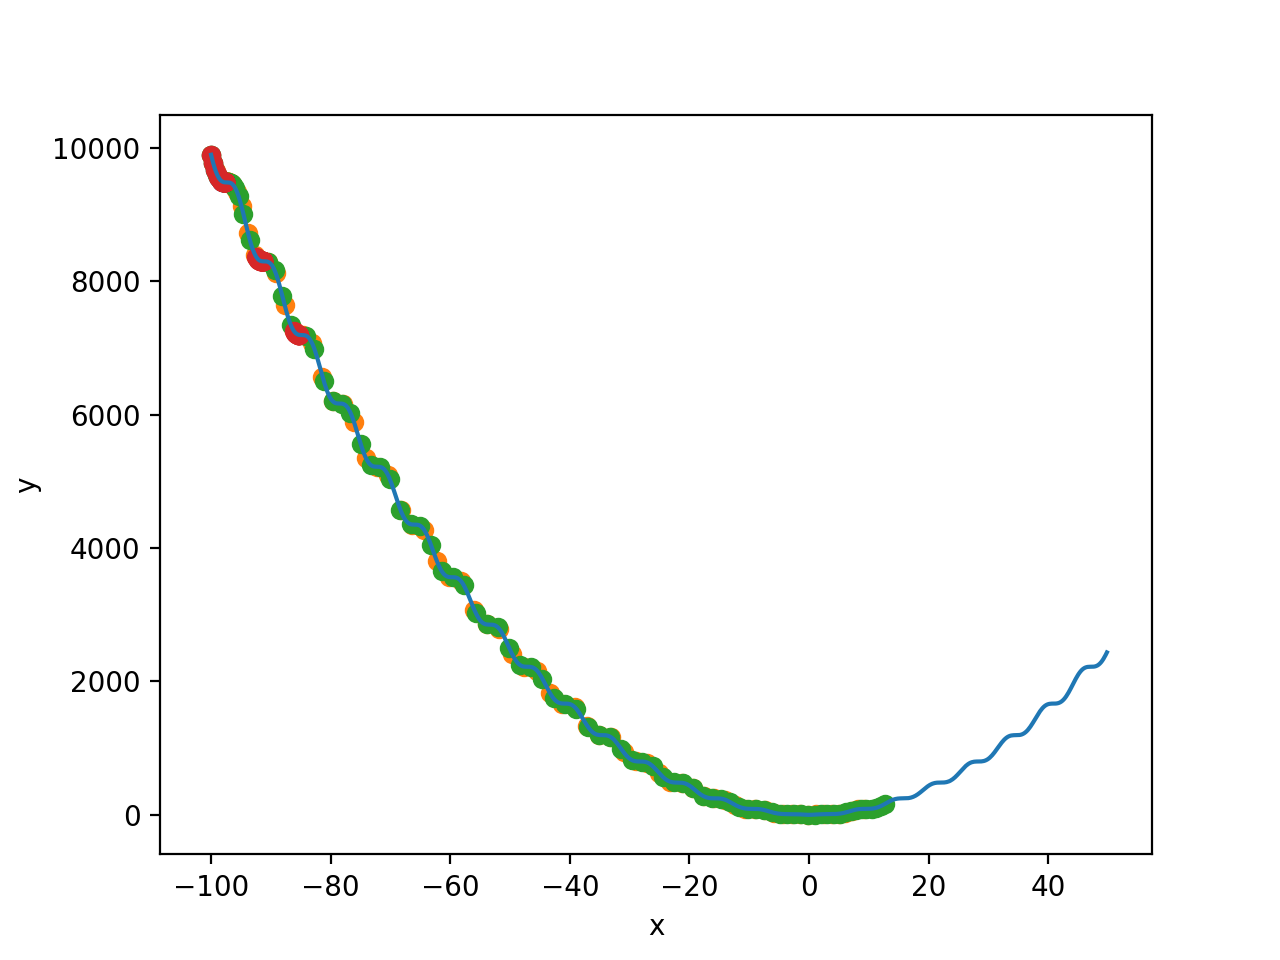

In [91]:
# no_of_runs=1
iterations=100
accuracy=1e-10
step_size=0.001
no_of_runs=1

global loss_type
#loss_type='coercive_saddle'
loss_type='1d'
list_loss = []
list_x = []
list_methods = []
list_steps = []
#plot limits
limits=np.array((-100,50))

GD=True
PGD=True
AGD=True
PAGD=True
Momentum=False



w_0=-100


if GD:

    loss_collector=[]
    x_collector=[]
    for k in range(no_of_runs):
        (GD_steps,_x,_loss)= Gradient_Descent(w_0,iterations,step_size,accuracy)
        loss_collector.append(_loss)
        x_collector.append(_x)
    GD_loss = [float(sum(col))/len(col) for col in zip(*loss_collector)]
    GD_x =[float(sum(col))/len(col) for col in zip(*x_collector)]   
    
    list_loss.append(GD_loss)
    list_x.append(GD_x)
    list_methods.append('GD')
    list_steps.append(GD_steps)
 
if AGD:

    loss_collector=[]
    x_collector=[]
    for k in range(no_of_runs):
        (AGD_steps,_x,_loss)= Accelerated_Gradient_Descent(w_0,iterations,step_size,accuracy)
        loss_collector.append(_loss)
        x_collector.append(_x)
    AGD_loss = [float(sum(col))/len(col) for col in zip(*loss_collector)]
    AGD_x =[float(sum(col))/len(col) for col in zip(*x_collector)]   
    
    list_loss.append(AGD_loss)
    list_x.append(AGD_x)
    list_methods.append('AGD')
    list_steps.append(AGD_steps)

if PAGD:
    radius=0.1
    g_thres=0.5
    t_thres=1
    f_thres=-0.05  #if PGD ascends more than f_thres in t_thres iterations since pertubation->stop.
    loss_collector=[]
    x_collector=[]
    for k in range(no_of_runs):
        (PAGD_steps,_x,_loss)= Perturbed_Accelerated_Gradient_Descent(w_0,iterations,step_size,accuracy,t_thres, g_thres,f_thres,radius)
        loss_collector.append(_loss)
        x_collector.append(_x)
    PAGD_loss = [float(sum(col))/len(col) for col in zip(*loss_collector)]
    PAGD_x =[float(sum(col))/len(col) for col in zip(*x_collector)]   
    
    list_loss.append(PAGD_loss)
    list_x.append(PAGD_x)
    list_methods.append('PAGD')
    list_steps.append(PAGD_steps)
    
if Momentum:
    loss_collector=[]
    
    x_collector=[]
    for k in range(no_of_runs):
        (Momentum_steps,_x,_loss)= Heavy_Ball(w_0,iterations,step_size,accuracy)
        loss_collector.append(_loss)
        x_collector.append(_x)
    Momentum_loss = [float(sum(col))/len(col) for col in zip(*loss_collector)]
    Momentum_x =[float(sum(col))/len(col) for col in zip(*x_collector)]   
    
    list_loss.append(Momentum_loss)
    list_x.append(Momentum_x)
    list_methods.append('Momentum')
    list_steps.append(Momentum_steps)

if PGD:
    radius=5
    g_thres=5
    t_thres=1
    f_thres=-0.05  #if PGD ascends more than f_thres in t_thres iterations since pertubation->stop.
    loss_collector=[]
    x_collector=[]
    for k in range(no_of_runs):
        opt_gap=compute_loss(w_0)-(-1/4)
        (PGD_steps,_x,_loss)= Pertubed_Gradient_Descent(w_0,iterations,step_size,accuracy,t_thres, g_thres,f_thres,radius)
        loss_collector.append(_loss)
        x_collector.append(_x)
    PGD_loss = [float(sum(col))/len(col) for col in zip(*loss_collector)]
    PGD_x =[float(sum(col))/len(col) for col in zip(*x_collector)]   
    
    list_loss.append(PGD_loss)
    list_x.append(PGD_x)
    list_methods.append('PGD')
    list_steps.append(PGD_steps)    
    
make_plot(list_loss,list_x,list_methods,list_steps,limits)


here momentum seems to help with the later saddles especially which is not suprising since the momentum term always helps into the negative eigendirections ... This hints towards momentum helping for functions that have somehow positively correlated negative eigendirections 

### some necessary functions:

In [63]:
 def compute_loss(w):
        
    if loss_type=='1d':
        loss= (w+np.sin(w))**2       
    else:
        raise ValueError("Unknown losstype!")
    
    return loss

def compute_gradients(w):
# forward pass

    if loss_type=='1d':
        grad= 2*(w + np.sin(w))*(np.cos(w) + 1)
    else:
        raise ValueError("Unknown losstype!")
        
    return grad



def make_plot(list_loss,list_x,list_methods,list_steps,limits):
    colors = ['#42A5F5', '#FFB300', '#BA68C8','#7CB342']

    s=0.2
    t1 = np.arange(limits[0], limits[1], s)

   

    #2. Plot performance over time/steps
    plt.figure(1)

    plt.plot()
    for i in range(len(list_loss)):
        plt.plot(list_x[i], list_loss[i],color= colors[i])
    plt.legend(list_methods,fontsize=12, loc=1)
    
    #3 .Plot Error Surface
    plt.figure(2)
    plt.plot(t1, (t1+np.sin(t1))**2)

    # Show iterates
    for i in range(len(list_loss)):
        plt.scatter(list_steps[i],list_loss[i])

        

    plt.xlabel('x')
    plt.ylabel('y')



### Gradient Descent

In [51]:
# Run GD (simultaneously)
def Gradient_Descent(w,iterations,step_size,accuracy):
    iterates=[]
    loss=[]
    x=[]
    for k in range(iterations): 
        #safe information
        iterates.append(w)
        x.append(k-1)
        loss.append(compute_loss(w))
        
        #take step
        grad=compute_gradients(w)  
        w=w-step_size*grad
        if np.linalg.norm(grad)<accuracy:
            break

    return(iterates,x,loss)

### Accelerated Gradient Descent

In [5]:
#Run AGD
def Accelerated_Gradient_Descent(w,iterations,step_size, accuracy):
    iterates=[]
    loss=[]
    x=[]
    w_old=w

    for k in range(1,iterations+1): 
        iterates.append(w)
        x.append(k-1)
        loss.append(compute_loss(w))
        
        #compute y_(k)
        y=w+(k-1)/(k+2)*(w-w_old)
        if loss_type=='tube':
            if y[1]<0:
                y[1]=-y[1]
        #store x_(k-1)
        w_old=w
        #compute gradients
        grad=compute_gradients(y)
        w=y-step_size*grad
        if loss_type=='tube': #if no mirroring trick is used in gradients. apply here!
            if w[1]<0:
                print(' neg x_2')
            #    w[1]=-w[1]
 
        if np.linalg.norm(grad)<accuracy:

            break

    return(iterates,x,loss)

In [78]:
def Perturbed_Accelerated_Gradient_Descent(w,iterations,step_size,accuracy,t_thres, g_thres,f_thres,radius):
    iterates=[]
    loss=[]
    x=[]
    w_old=w
  
    t_noise=-t_thres-1
    eta=step_size
    
    for k in range(iterations): 
        #safe information
        iterates.append(w)
        x.append(k-1)
        loss_w=compute_loss(w)
        loss.append(loss_w)
        
        #compute y_(k)
        y=w+(k-1)/(k+2)*(w-w_old)
        if loss_type=='tube':
            if y[1]<0:
                y[1]=-y[1]
        #store x_(k-1)
        w_old=w
        #compute gradients
        grad=compute_gradients(y) 
        
        #Should we perturb the extrapolation point or rather x_k+1.. My guess is the extrapolation point.
        
        if np.linalg.norm(grad)<g_thres:
            #Sample 1 point uniformly form ball with radius r 
            p=radius*np.ones(1)
            while np.linalg.norm(p)>radius:
                p = radius*np.random.normal(size=(1, 1))[0]
            _y=y
            t_noise=k
            y=_y+p
            grad=compute_gradients(y)  
            
        w=y-step_size*grad
        
        if loss_type=='tube':
            if w[1]<0:
                print(' neg x_2')
                #w[1]=-w[1]
    
        if np.linalg.norm(grad)<accuracy:
            break

    return(iterates,x,loss)

### Momentum

In [3]:
#Run Momentum
def Heavy_Ball(w,iterations,step_size, accuracy):
    iterates=[]
    loss=[]
    x=[]
    w_old=w

    for k in range(1,iterations+1): 
        iterates.append(w)
        x.append(k-1)
        loss.append(compute_loss(w))
        
        #compute y_(k)
        y=w+(k-1)/(k+2)*(w-w_old)
        #store x_(k-1)
        w_old=w
        #compute gradients
        grad=compute_gradients(w)
        w=y-step_size*grad
 
        if np.linalg.norm(grad)<accuracy:
            break

    return(iterates,x,loss)

### Pertubed Gradient Descent

In [81]:
# Run GD (simultaneously)
def Pertubed_Gradient_Descent(w,iterations,step_size,accuracy,t_thres, g_thres,f_thres,radius):
    iterates=[]
    loss=[]
    x=[]
  
    t_noise=-t_thres-1
    eta=step_size
    
    for t in range(iterations): 
        #safe information
        iterates.append(w)
        x.append(t-1)
        loss_w=compute_loss(w)
        loss.append(loss_w)
        
        grad=compute_gradients(w)  
        
        if np.linalg.norm(grad)<g_thres:
            #Sample 1 point uniformly form ball with radius r 
            p=radius*np.ones(1)
            while np.linalg.norm(p)>radius:
                p = radius*np.random.normal(size=(1, 1))[0]
            _w=w
            t_noise=t
            w=_w+p
            grad=compute_gradients(w)              
            
        #if t-t_noise==t_thres and loss_w-compute_loss(_w)>-f_thres: #stop pertubing around minimizers
        #    iterates[-1]=_w
        #    loss[-1]=compute_loss(_w)
        #    break
        
        w=w-eta*grad
        if np.linalg.norm(grad)<accuracy:
            break

    return(iterates,x,loss)